<a href="https://colab.research.google.com/github/vinicius-souza-lima/mvp_ADBP/blob/main/MVP_ADBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Nome:Vinícius de Souza Lima.

Link para o Reposítório: [MVP Análise de Dados e Boas Práticas](https://github.com/vinicius-souza-lima/mvp_ADBP)


Foi utilizado um dataset proveniente do Kaggle, [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download), o qual traz informações de mais de 85.000 jogos publicados na Steam, a maior plataforma de jogos de PC do mercado.

In [ ]:
#!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from wordcloud import WordCloud
import re
import ast
from sklearn.preprocessing import MinMaxScaler # normalização

In [2]:
# Upload dos dados com carga do dataset através da url
games = pd.DataFrame({})
for i in range(10):
  url_dados = 'https://raw.githubusercontent.com/vinicius-souza-lima/mvp_ADBP/main/dataset/games-'+ str(i+1) + '.csv'
  games = pd.concat([games,pd.read_csv(url_dados)])

In [3]:
#@title Dicionário de dados
pd.DataFrame({"Nome": games.columns,
              "Significado": ["Identificador Único",
                              "Nome",
                              "Data de Lançamento",
                              "Estimativa de Quantidade de Usuários",
                              "Máximo número de jogadores simultâneos",
                              "Indicação etária",
                              "Preço em USD",
                              "Número de Extensões do Jogo",
                              "Sobre o jogo",
                              "Lista de linguas escritas suportadas",
                              "Linguagens com dublagem completa",
                              "Avaliações",
                              "Url da imagem de capa na Steam",
                              "Url do site",
                              "Url do suporte",
                              "E-mail do suporte",
                              "Disponível no Windows?",
                              "Disponível no Mac?",
                              "Disponível no Linux?",
                              "Score no Metacritic",
                              "URL da review do Metacritic",
                              "Avaliação do usuário",
                              "Avaliações Positivas",
                              "Avaliações Negativas",
                              "Posição no rank de avaliações",
                              "Quantidade de conquistas Steam",
                             "Quantidade de recomendações",
                              "Notas",
                              "Tempo médio de jogo desde a publicação",
                              "Tempo médio de jogo nas ultimas duas semanas",
                              "Mediana do tempo de jogo desde a publicação",
                              "Mediana do tenpo de jogo nas ultimas duas semanas",
                              "Desenvolvedores",
                              "Publicadores",
                              "Categorias que o jogo se enquadra",
                              "Lista de gêneros do que o jogo se enquadra",
                              "Lista de Etiquetas",
                              "Url das capturas de tela",
                              "Url do clipe"]})

,Nome,Significado
0,AppID,Identificador Único
1,Name,Nome
2,Release date,Data de Lançamento
3,Estimated owners,Estimativa de Quantidade de Usuários
4,Peak CCU,Máximo número de jogadores simultâneos
5,Required age,Indicação etária
6,Price,Preço em USD
7,DLC count,Número de Extensões do Jogo
8,About the game,Sobre o jogo
9,Supported languages,Lista de linguas escritas suportadas


### Tipos de dados dos atributos

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 0 to 8494
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     39452 non

# Definição do Problema

Através de um conjunto de caracterísiticas de um jogo, quero prever o pico de jogadores simultâneos (Peak CCU). Trata-se de um problema de aprendizado supervisionado, mais especificamente de regressão múltipla, no qual serão usados tanto variáveis categóricas quando numéricas. As premissas adotadas são que o dataset é representativo da totalidade dos jogos encontrados na plataforma. As restrições são que o dataset traz informações até a data de publicação de 9 de setembro de 2023.

# Análise de Dados

## Estatísticas descritivas

### Verificação das primeiras linhas

In [ ]:
games.iloc[:,:19].head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False


In [ ]:
games.iloc[:,19:].head()

,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Chamam a atenção as colunas com valores faltantes e a presença de colunas que tazem listas de categorias, além disso há colunas com metadados no formato de links.

### Valores faltantes

Através das funções `isnull()` e `sum()` consegue-se contabilizar a quantidade de valores faltantes em cada uma das colunas e assim obter o percentual de valores nulos no dataset. Pode-se observar que há seis colunas com mais de 50% dos valores faltantes.

In [ ]:
games.isnull().sum().sort_values(ascending = False)/games.shape[0]*100

,0
Score rank,99.948298
Metacritic url,95.403217
Reviews,88.551520
Notes,84.699717
Website,53.642057
Support url,51.134508
Tags,24.793486
Support email,15.975935
Movies,7.582576
Categories,5.402865


<Axes: >

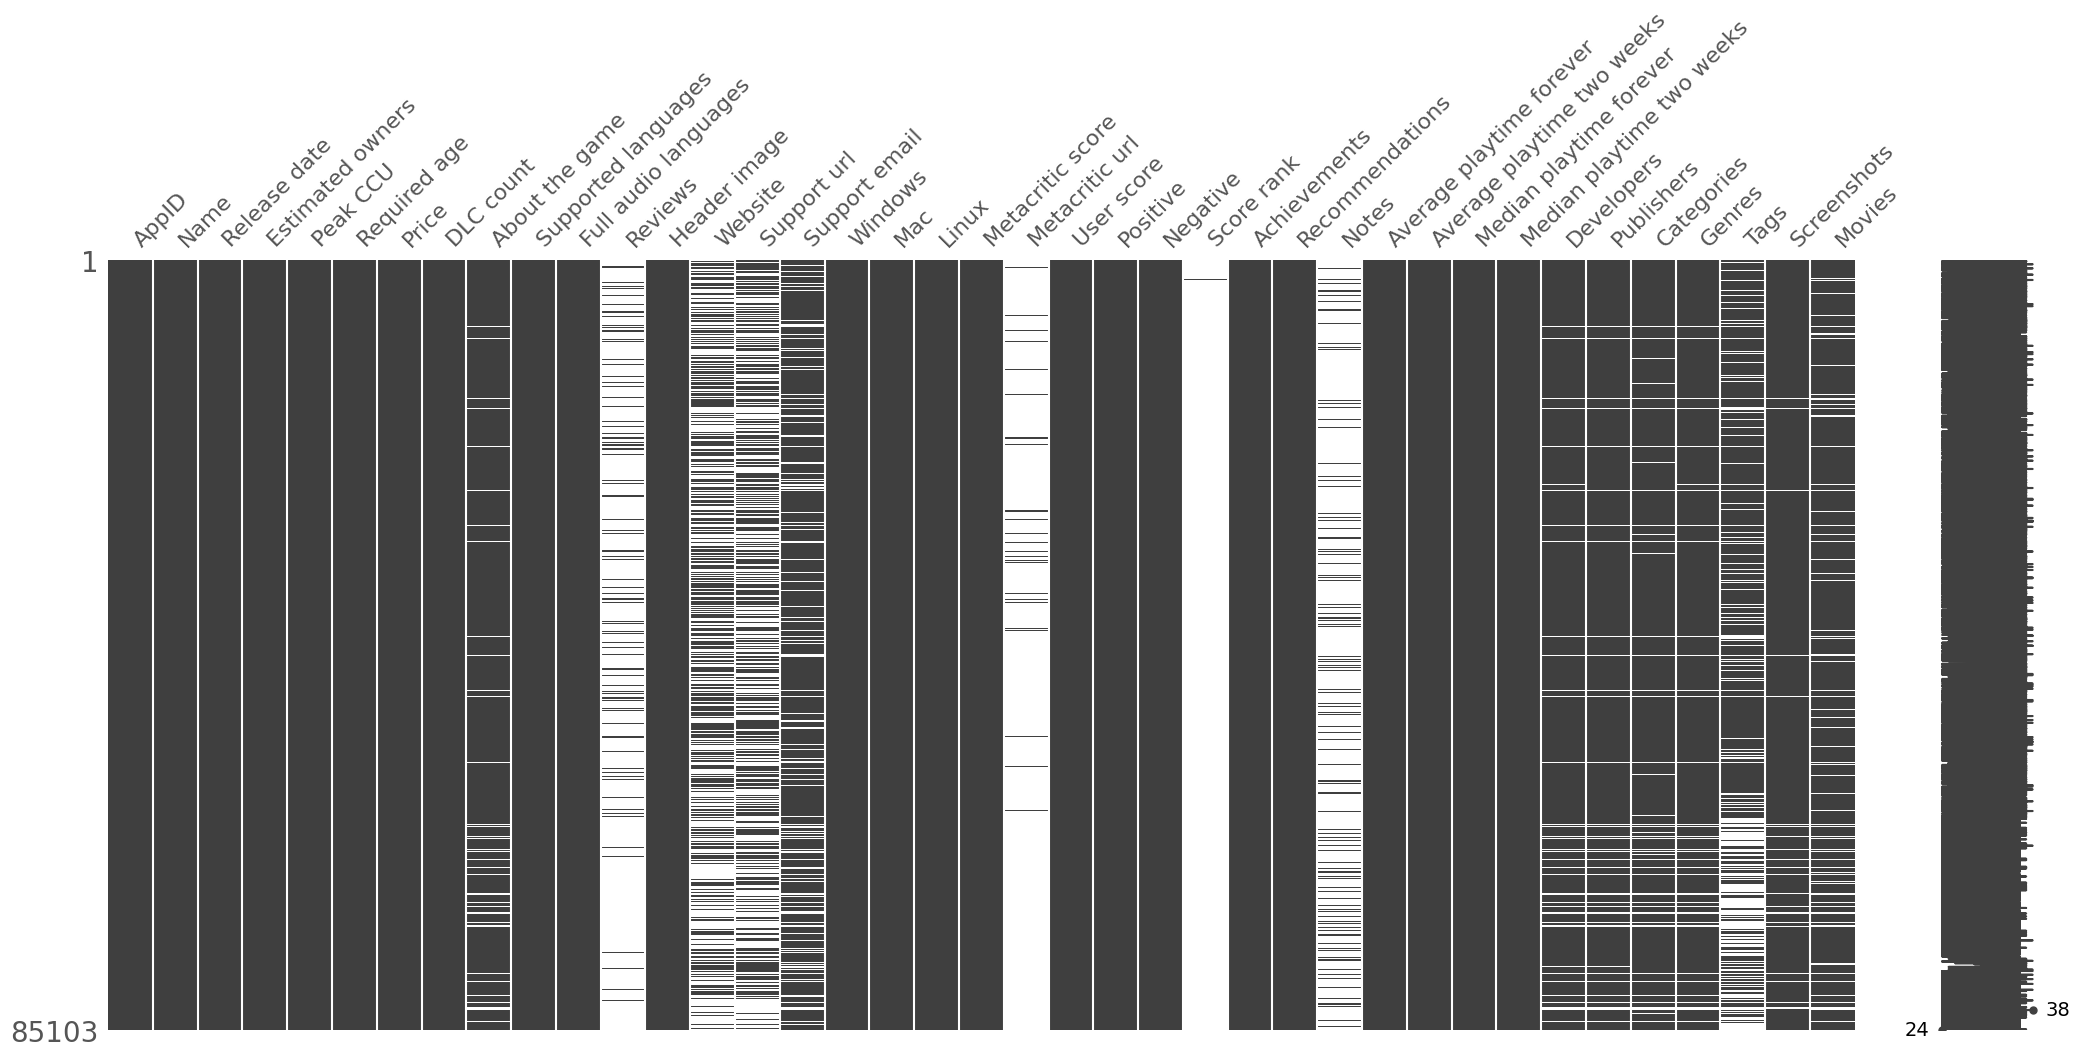

In [ ]:
ms.matrix(games)

### Resumo estatístico

Abaixo traz-se o resumo estatístico das variáveis numéricas do dataset, indicando contagem, média, desvio padrão, valor mínimo, percentis e máximo.

In [ ]:
games.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


Pode-se observar também o percentual de outliers em cada coluna numérica da seguinte forma

In [ ]:
# DataFrame apenas com valores numéricos
games_numeric = games.select_dtypes(include=[np.number])

# Definição intervalo interquantil
Q1 = games_numeric.quantile(0.25)
Q3 = games_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filtragem dos outliers e contagem do percentual
outliers = ( (games_numeric < (Q1 - 1.5 * IQR)) | (games_numeric > (Q3 + 1.5 * IQR)) ).sum()
total = games_numeric.count()
(outliers/total*100).sort_values(ascending = False)

,0
Average playtime forever,17.521121
Median playtime forever,17.521121
Positive,16.979425
Recommendations,16.168643
Negative,16.089915
Peak CCU,14.964220
DLC count,13.912553
Achievements,7.080831
Price,4.734263
Metacritic score,4.596783


## Visualizações

In [ ]:
# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

#### Release date

In [ ]:
games_datetime = pd.to_datetime(games["Release date"], format = "mixed")
games_ano = games_datetime.groupby([games_datetime.dt.year]).agg({'count'})

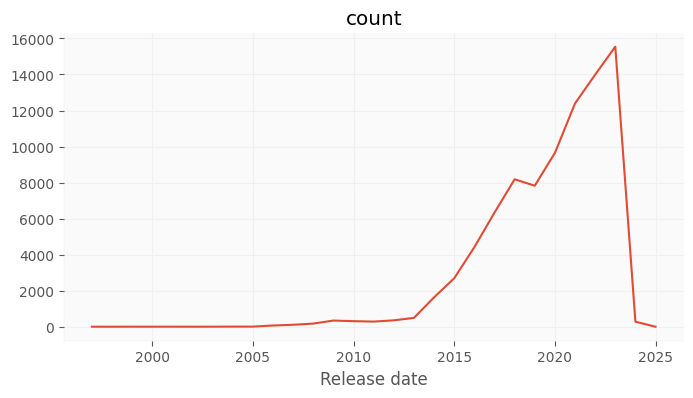

In [ ]:
games_ano['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Pode-se perceber o contínuo crescimento no número de jogos publicados na plataforma, desde por volta de 2013 até o ano atual, onde atingiu o pico histórico.

### Variáveis textuais

Para ilustrar as variáveis que contém teto, foram utilizadas nuvens de palavras. Abaixo é feita a implementação da função responsável por criar a nuvem de palavras. Como o tempo de execução da função é considerável foram geradas as imagens anteriormente.

In [ ]:
def show_wordcloud(column):
  """
  Função para gerar uma nuvem de palavras a partir de colunas de texto do
  dataset utilizado
  """
  wordcloud = WordCloud(max_words = 100, background_color = "white")
  text = " ".join(str(word) for word in games[column].to_numpy())
  wordcloud.generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#### Name

In [ ]:
# show_wordcloud("Name")

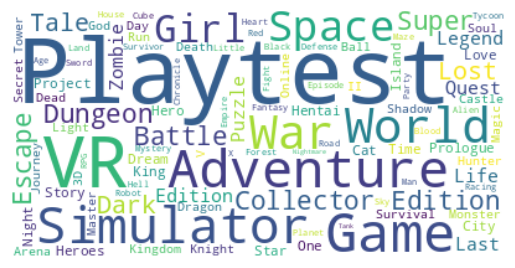

De fato é possível perceber palavras comuns a nomes de jogos, como *Game*, *VR*, *Simulator* e *Adventure*. Além disso, a forte presença da palavra "Playtest" se deve à prática dos desenvolvedores lançarem uma versão de teste antes do lançamento definitivo do jogo

#### About the game

In [ ]:
# show_wordcloud("About the game")

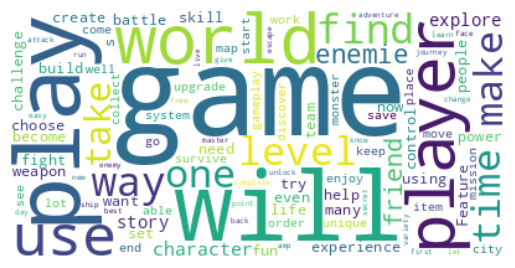

Como esperado, as descrições dos jogos trazem bastantes verbos de ação ("play","will","make","explore"), além de substativos relacionados ao mundo dos jogos ("level","player","enemie","weapon","fight").

#### Reviews

In [ ]:
#show_wordcloud("Reviews")

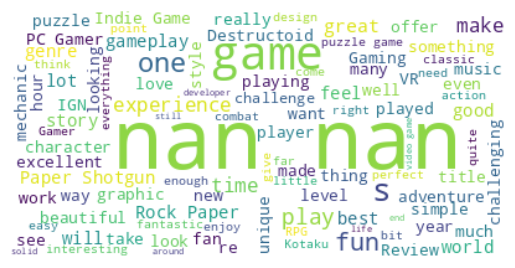

Percebe-se a presença de muitos valores nulos, justamente devido a falta de avaliações para a maioria dos jogos. Além disso palavras recorrentes ilustram a qualidade dos jogos, como "great", "good", "fun" e "beautiful"

#### Notes

In [ ]:
#show_wordcloud("Notes")

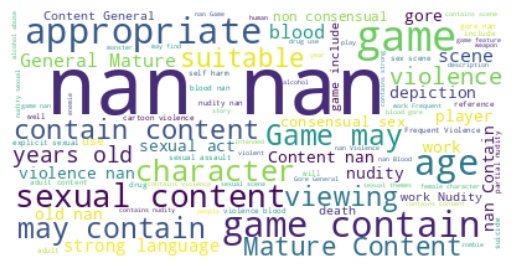

Da mesma forma, além de valores nulos, percebem-se palavras que remetem a notas do tipo classificação indicativa (age,appropriate), aviso de conteúdo (may,contain,mature,sexual) e trigger wanings (gore,violence, non consensual).

### Variáveis Categóricas

#### Estimated owners

Trata-se de uma variável qualitativa ordinal. Abaixo foi criado um dicionário para melhorar o formato de exibição nos gráficos.

In [ ]:
estimated_owners_format = {
    '0 - 20000':'0 - 20K',
    '20000 - 50000':'20K - 50K',
    '50000 - 100000':'50K - 100K',
    '100000 - 200000':'100K - 200K',
    '200000 - 500000': '200K - 500K',
    '500000 - 1000000': '500K - 1M',
    '1000000 - 2000000': '1M - 2M',
    '2000000 - 5000000': '2M - 5M',
    '5000000 - 10000000': '5M - 10M',
    '10000000 - 20000000': '10M - 20M',
    '20000000 - 50000000': '20M - 50M',
    '50000000 - 100000000': '50M - 100M',
    '100000000 - 200000000': '100M - 200M'
}

In [ ]:
games['Estimated owners'] = games["Estimated owners"].map(estimated_owners_format).fillna(games["Estimated owners"])

Text(0.5, 1.0, 'Quantidade de donos estimados')

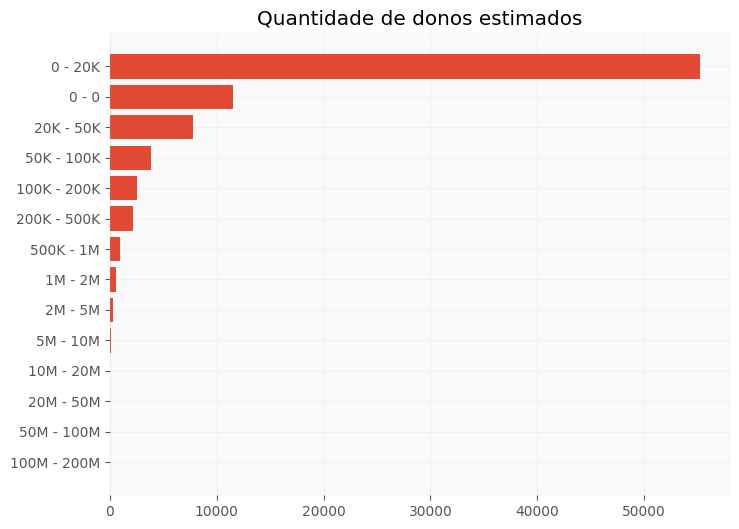

In [ ]:
owners_count = games["Estimated owners"].value_counts(ascending = True)
fig,ax = plt.subplots(figsize = (8,6))
ax.barh(y=owners_count.index,width=owners_count)
plt.title("Quantidade de donos estimados")

Percebe-se que o intervalo mais comum é o de 0 a 20 mil usuários, seguido de zero usuários.

#### Categories

A função abaixo conta as aparições de cada categoria nas listas de categorias fornecidas.

In [ ]:
def count_in_list(column_code):
  col_freq = {}
  for i in range(games.shape[0]):
    col_list = games.iloc[i,column_code]
    try:
      for col in col_list.split(","):
        if col not in col_freq:
          col_freq[col] = 0
        else:
          col_freq[col] += 1
    except AttributeError:
      continue
  return pd.DataFrame.from_dict(col_freq, orient = 'index', columns=["Count"]).sort_values(by="Count", ascending = True)

In [ ]:
df_cat = count_in_list(34)

<BarContainer object of 41 artists>

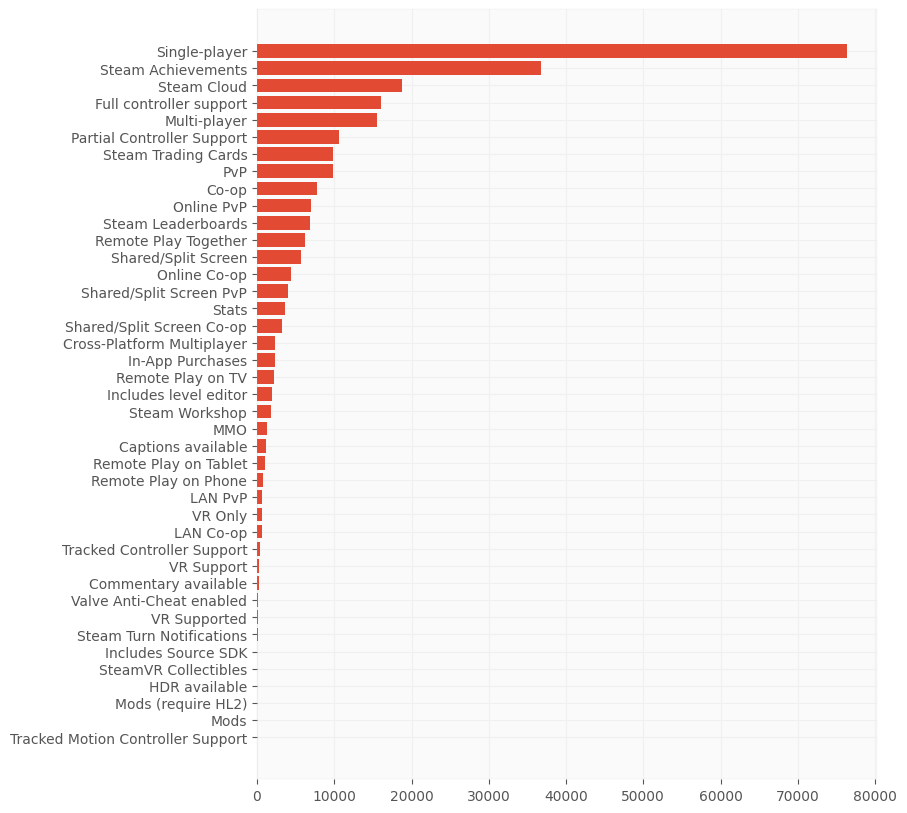

In [ ]:
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_cat.index,width=df_cat["Count"])

Percebe-se como são populares jogos Single-player e que possuem conquistas Steam.

#### Genres

In [ ]:
df_gen = count_in_list(35)

<BarContainer object of 33 artists>

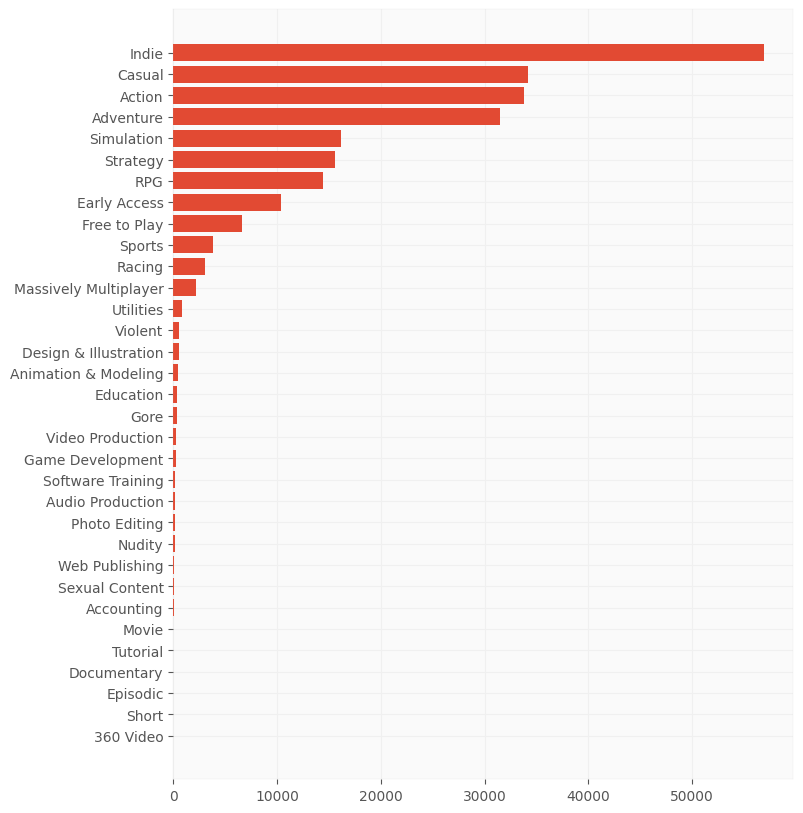

In [ ]:
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_gen.index,width=df_gen["Count"])

Quanto aos gêneros, percebe-se que os mais comuns são indie, casual e action.

#### Tags

In [ ]:
df_tags = count_in_list(36)

<BarContainer object of 20 artists>

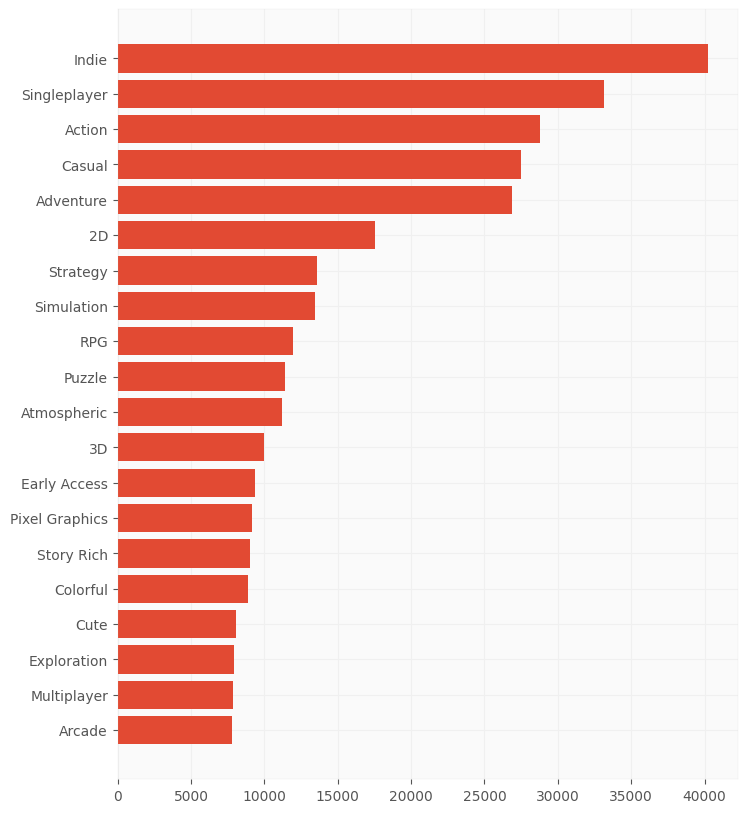

In [ ]:
df_tags = df_tags.tail(20)
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_tags.index,width=df_tags["Count"])

Já quando se trata de marcadores, o mais comum é também *indie*, seguido de *single player* e *action*

#### Supported languages

As células abaixo transformam a representação string das listas de linguagens em listas propriamente ditas, em seguida explodem essas listas e fazem a contagem das linguagens para a geração do gráfico

In [ ]:
df_lang = games["Supported languages"].str.strip("][")
df_lang = df_lang.str.replace("'","",regex=False) \
                 .str.replace(", ",",", regex= False) \
                 .str.replace("\\n",",") \
                 .str.replace("\\r",",") \
                 .str.replace("\\b","")
df_lang = df_lang.apply(lambda lista_string: str(lista_string).split(','))

In [ ]:
conta_idiomas = df_lang.explode().value_counts(ascending = True)

<BarContainer object of 20 artists>

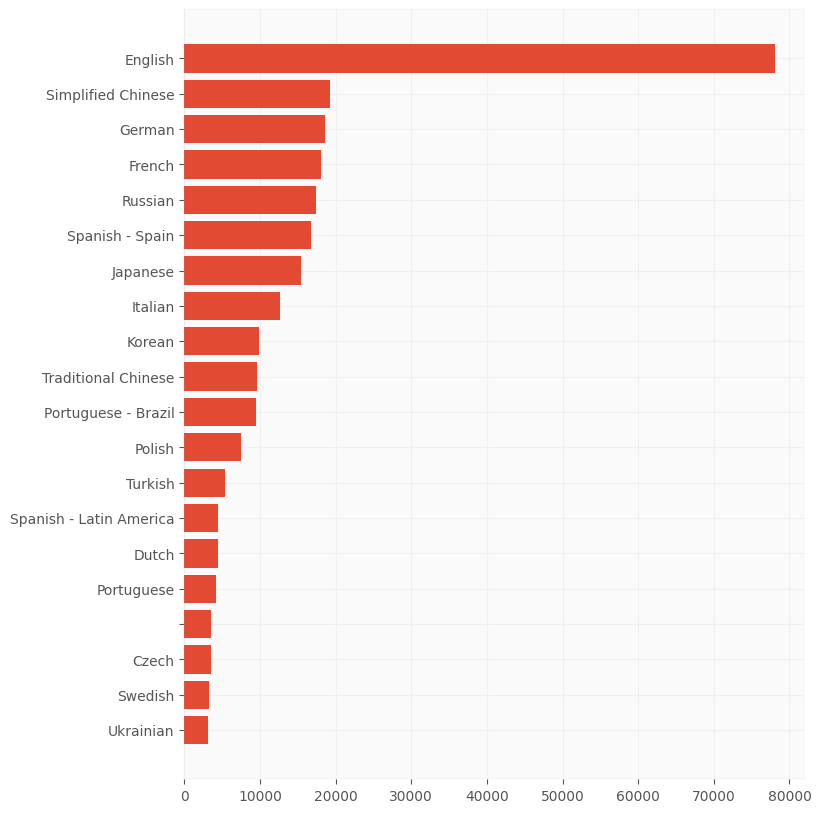

In [ ]:
conta_idiomas = conta_idiomas.tail(20)
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=conta_idiomas.index,width=conta_idiomas.values)

Dessa forma é possível perceber que a língua inglesa possui suporte escrito para quase a totalidade dos jogos presentes no dataset. Interessante também notar que há jogos sem qualquer suporte completo a uma lingua, possivelmente não foram informados ou obtidos na geração do dataset, representado pela barra sem legenda no gráfico.

#### Full audio languages

As células abaixo transformam a representação string das listas de linguas com suporte de aúdio

In [ ]:
df_audio = games["Full audio languages"].str.strip("][")
df_audio = df_audio.str.replace("'","",regex=False) \
                 .str.replace(", ",",", regex= False) \
                 .str.replace("\\n",",") \
                 .str.replace("\\r",",") \
                 .str.replace("\\b","")
df_audio = df_audio.apply(lambda lista_string: str(lista_string).split(','))

In [ ]:
# Explode a lista e conta as ocorrências dos valores
conta_audio = df_audio.explode().value_counts(ascending = True)

<BarContainer object of 20 artists>

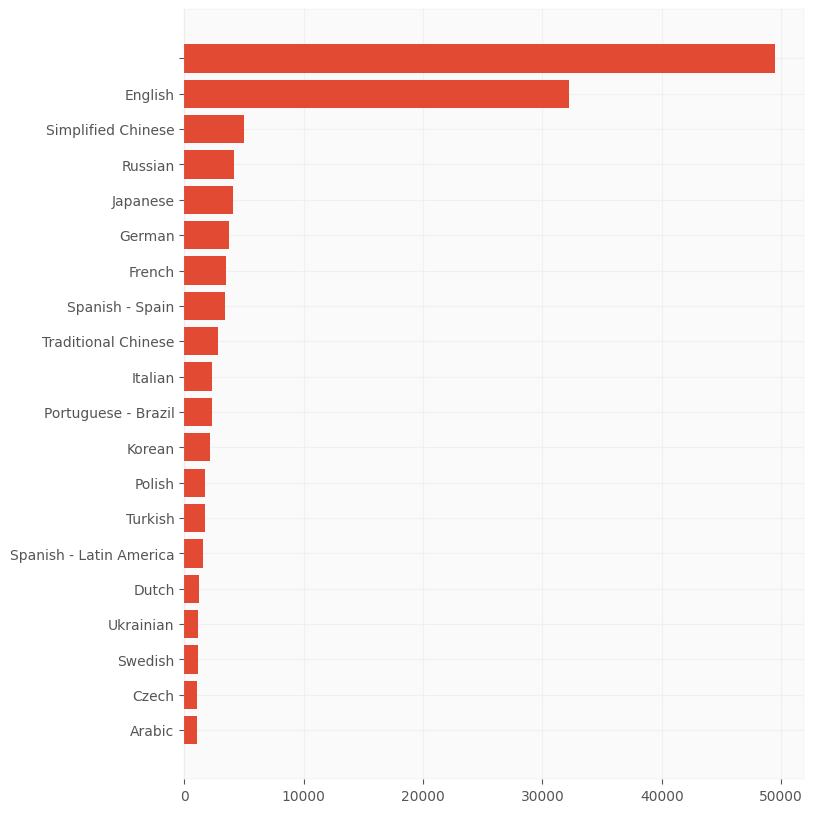

In [ ]:
conta_audio = conta_audio.tail(20)
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=conta_audio.index,width=conta_audio.values)

Dessa forma é possível perceber o curioso fato que a maioria dos jogos no dataset não possui qualquer suporte à linguagens de áudio, possivelmente não foram informados ou obtidos na criação do dataset. Já quanto à linguas suportadas inglês é a com maior suporte de aúdio, seguida de chinês simplificado, mesmo caso do

### Variáveis numéricas

O gráfico abaixo mostra a correlação entre as variáveis numéricas do dataset

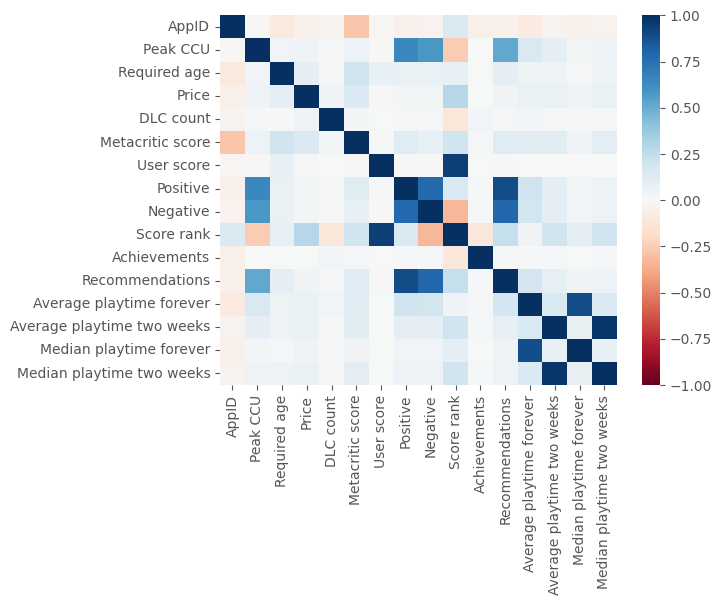

In [ ]:
sns.heatmap(games.select_dtypes(include=[np.number]).corr(), cmap='RdBu', vmin=-1, vmax=1);

Possível perceber que as variáveis com maior correlação positiva em relação à variável de interesse Peak CCU são Positive, Negative e Recommendations, assim avaliações e recomendações, sejam positivas ou negativas parecem influenciar na popularidade de um jogo. Enquanto isso Score Rank tem a correlação mais negativa, possivelmente porque os jogos mais bem avaliados

#### Peak CCU

A função abaixo remove os outliers de um dataframe com base no intervalo interquantil

In [ ]:
# DataFrame apenas com valores numéricos
def remove_outliers(df):
  df_numeric = df.select_dtypes(include=[np.number])

# Definição intervalo interquantil
  Q1 = df_numeric.quantile(0.25)
  Q3 = df_numeric.quantile(0.75)
  IQR = Q3 - Q1

# Filtragem dos outliers e contagem do percentual
  outliers_mask = ( (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)) ).any(axis=1)
  return df_numeric[~outliers_mask]

Função para facilitar a impressão de dos gráficos com e sem os outliers.

In [ ]:
def plot_hist_scatter(col):
  fix,ax = plt.subplots(2,2, figsize = (15,10))
  ax[0,0].hist(games[col])
  ax[0,0].set_title("Histograma "+col)
  ax[1,0].hist(remove_outliers(games[[col]]))
  ax[1,0].set_title("Histograma " + col + " retirando outliers")

  ax[0,1].scatter(games[col],games["Peak CCU"])
  ax[0,1].set_title("Scatterplot "+ col + " X Peak CCU")
  ax[1,1].scatter(remove_outliers(games[["Peak CCU",col]])[col],remove_outliers(games[["Peak CCU",col]])["Peak CCU"])
  ax[1,1].set_title("Scatterplot "+ col + " X Peak CCU sem outliers")

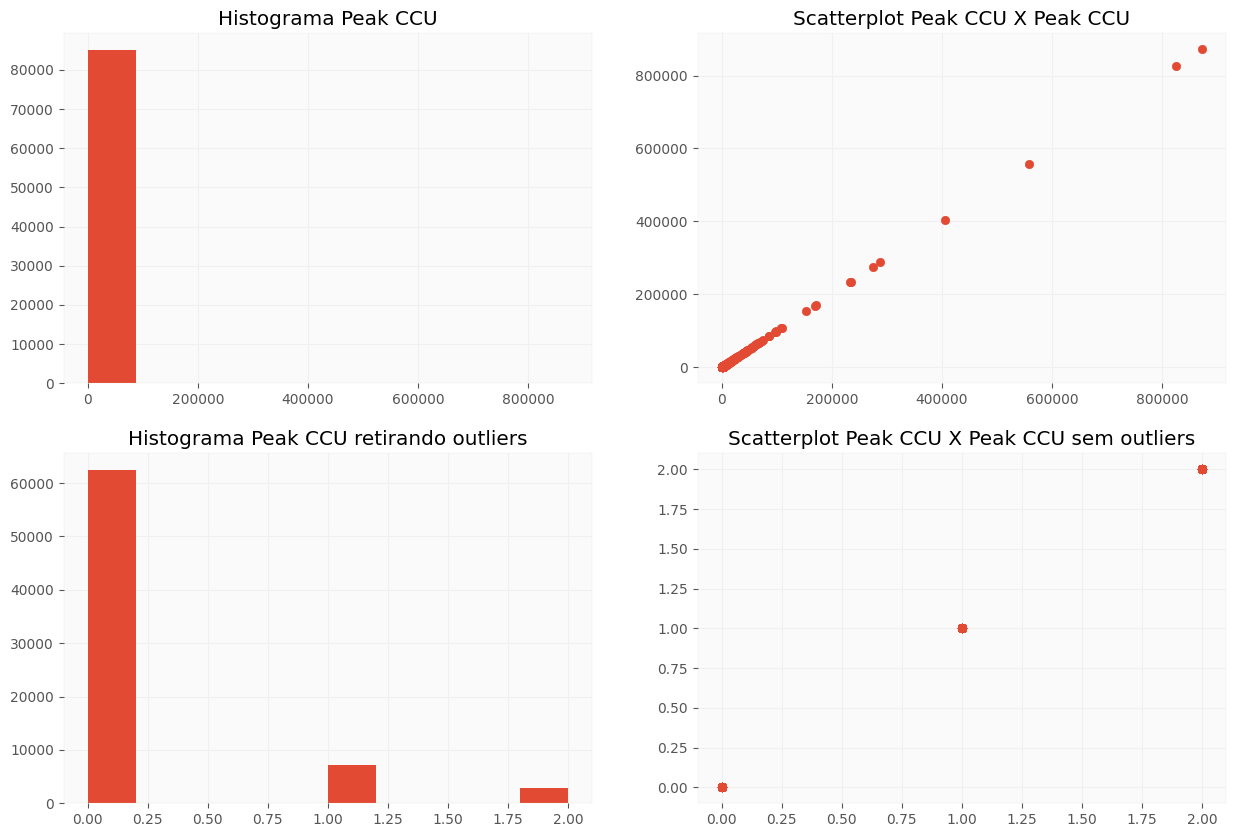

In [ ]:
plot_hist_scatter("Peak CCU")

Os histogramas mostram que os outliers distorcem a visualização da distribuição para um intervalo muito grande, e ao retirálos percebe-se a concentração dos valores em torno de 0, 1 e 2.

#### Required Age

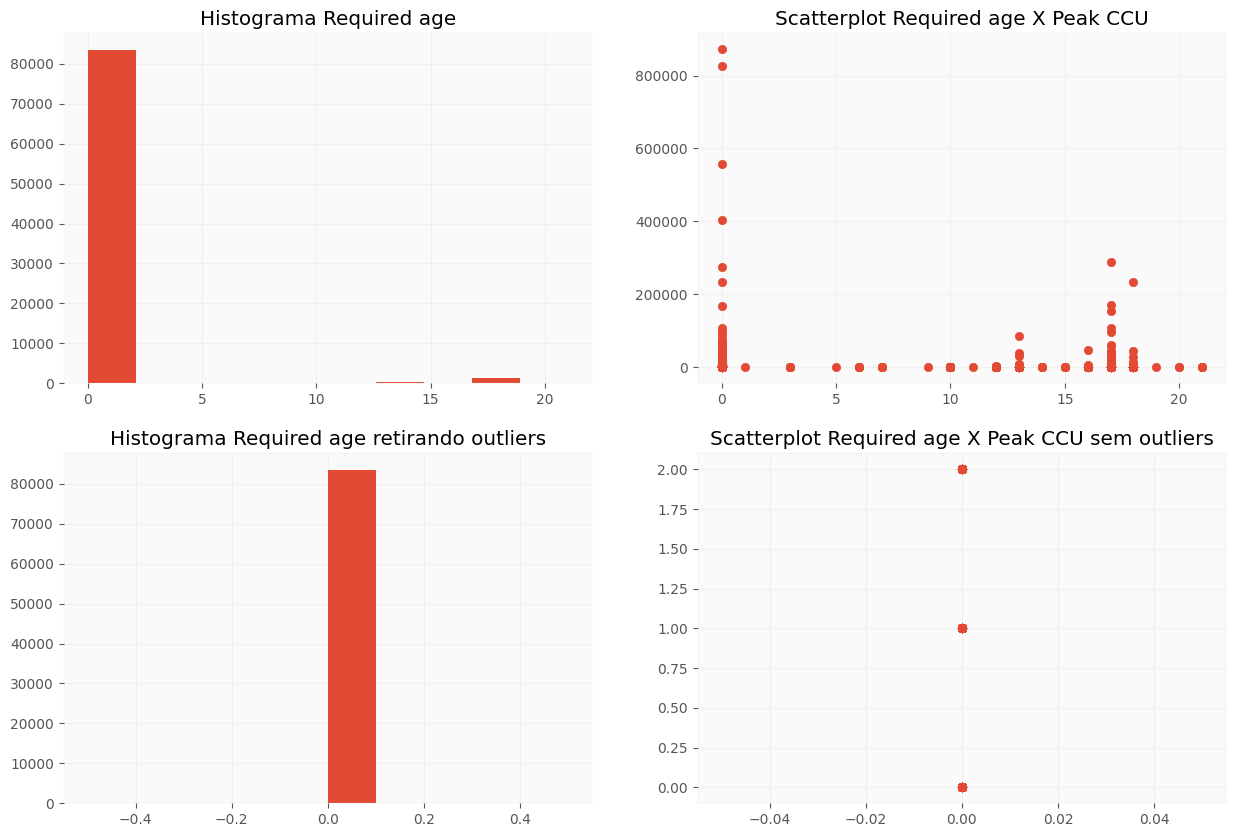

In [ ]:
plot_hist_scatter("Required age")

A maioria dos jogos possui classificação indicativa livre e antes de remover os outliers percebe-se que não há correlação clara entre as variáveis. Após remover os outliers percebe-se que a correlação é fraca

#### Price

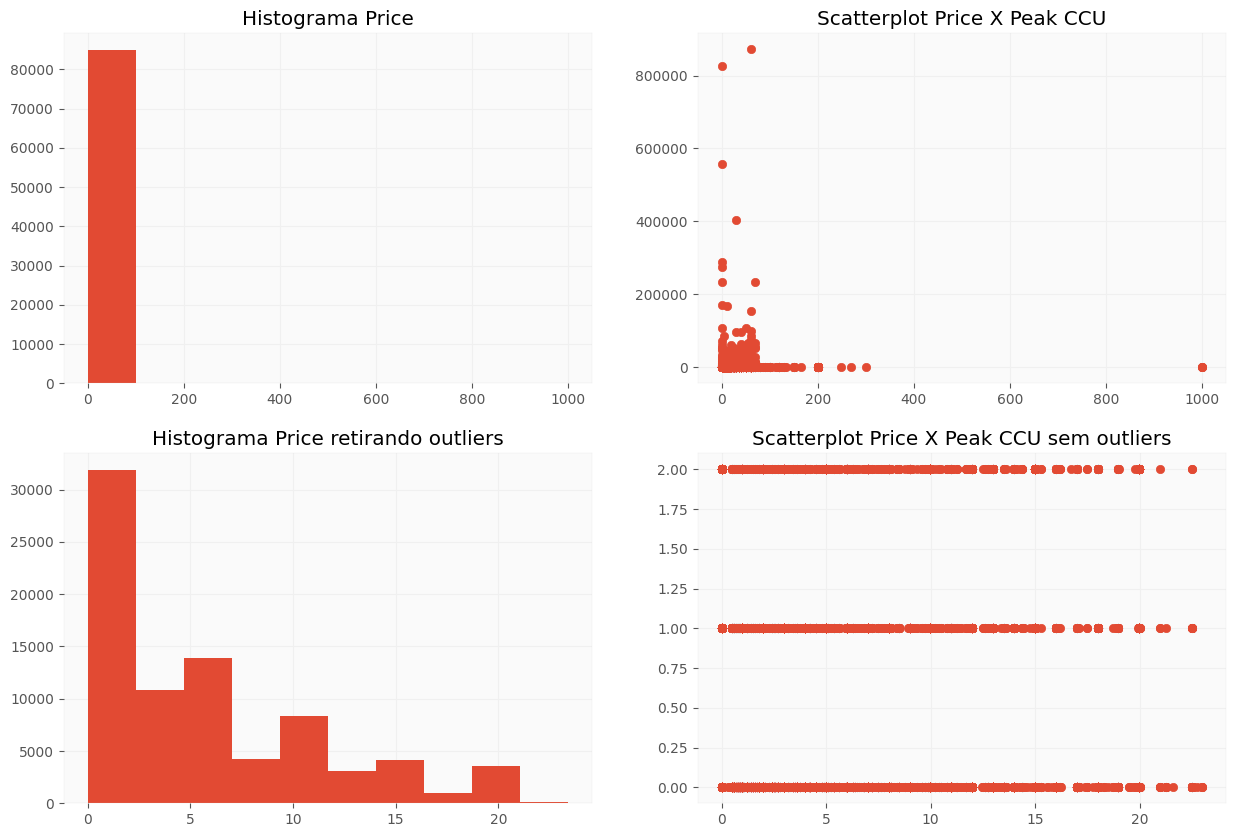

In [ ]:
plot_hist_scatter("Price")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### DLC Count

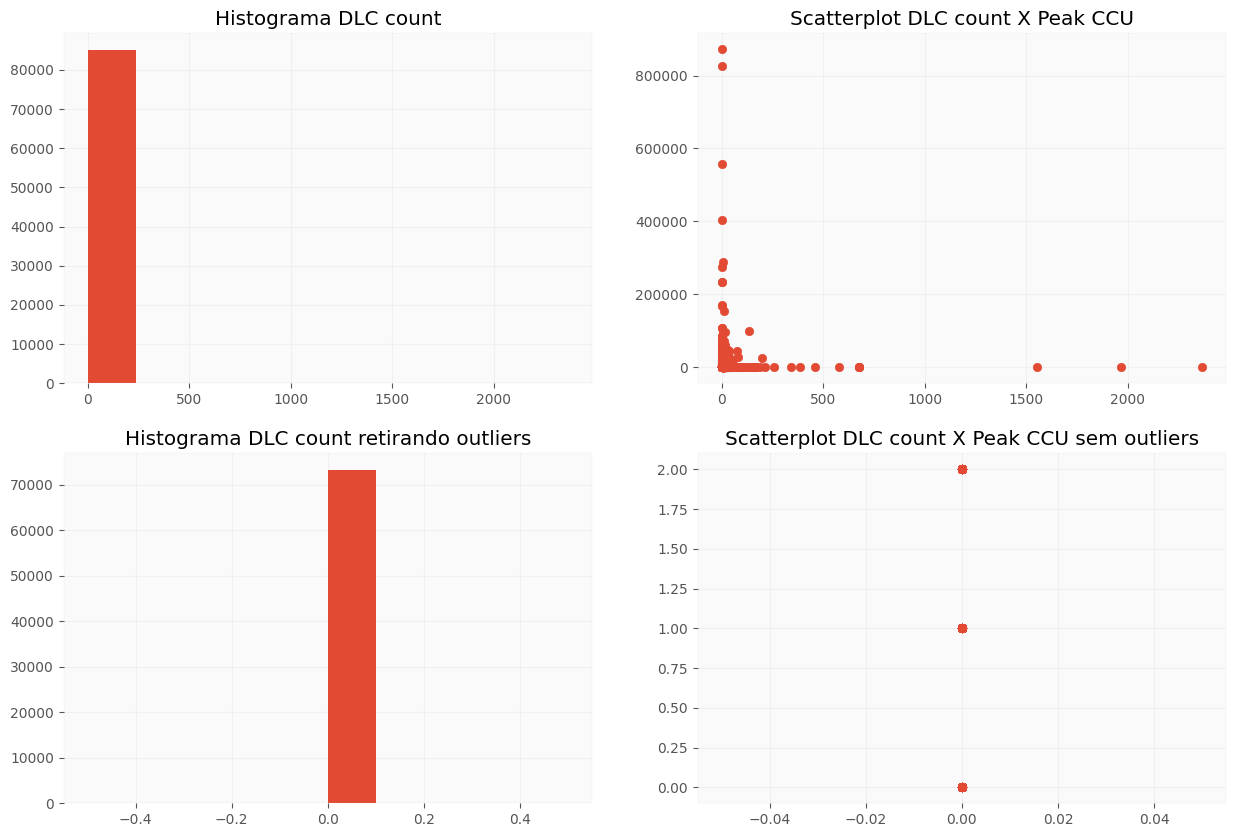

In [ ]:
plot_hist_scatter("DLC count")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a concentração em torno do baixo número de usuários simultâneos.

#### Metacritic Score

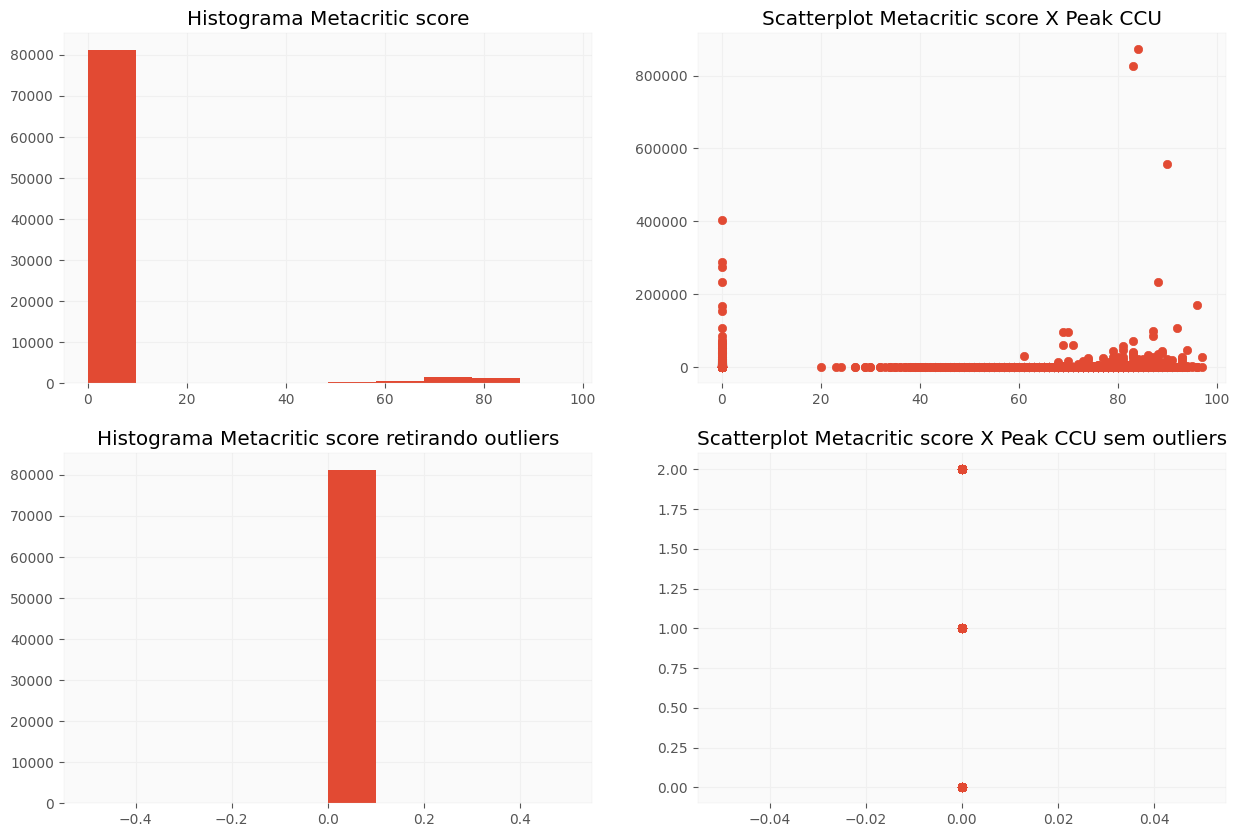

In [ ]:
plot_hist_scatter("Metacritic score")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### User Score

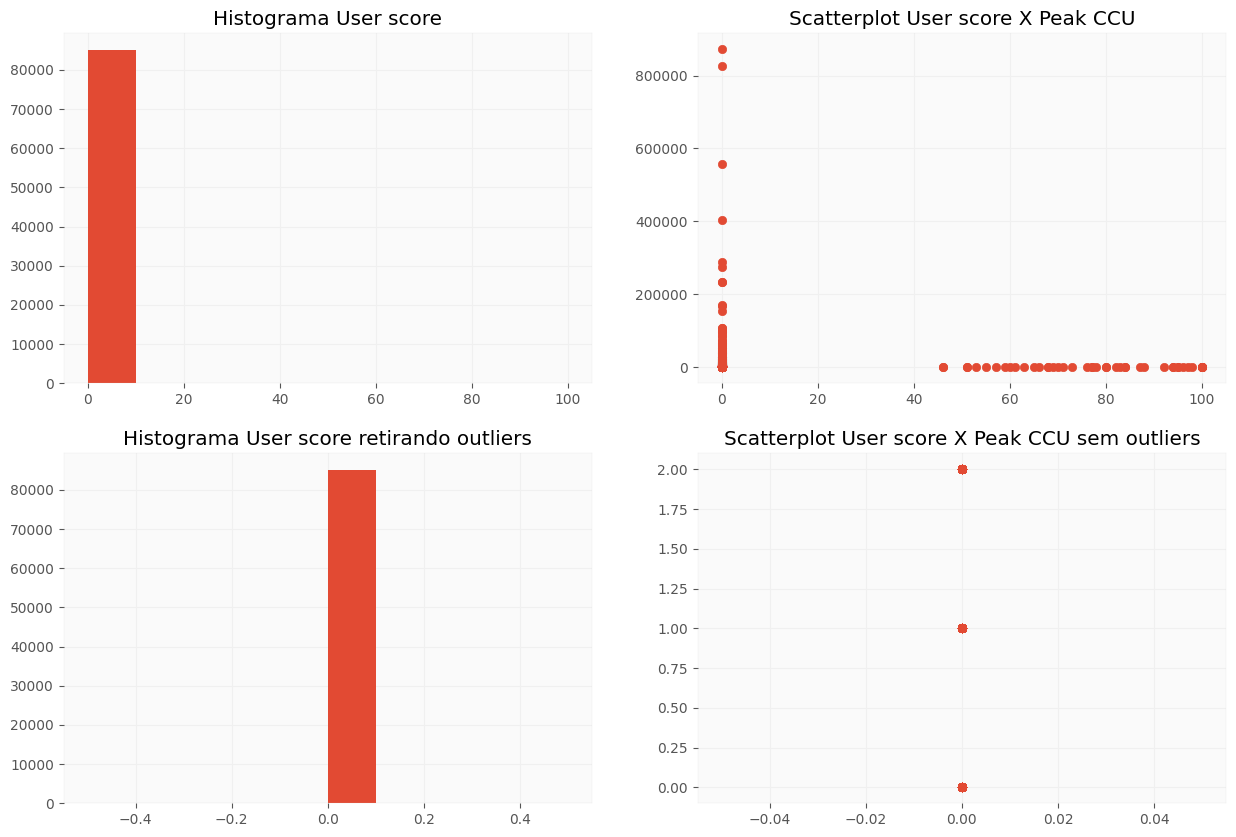

In [ ]:
plot_hist_scatter("User score")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Positive

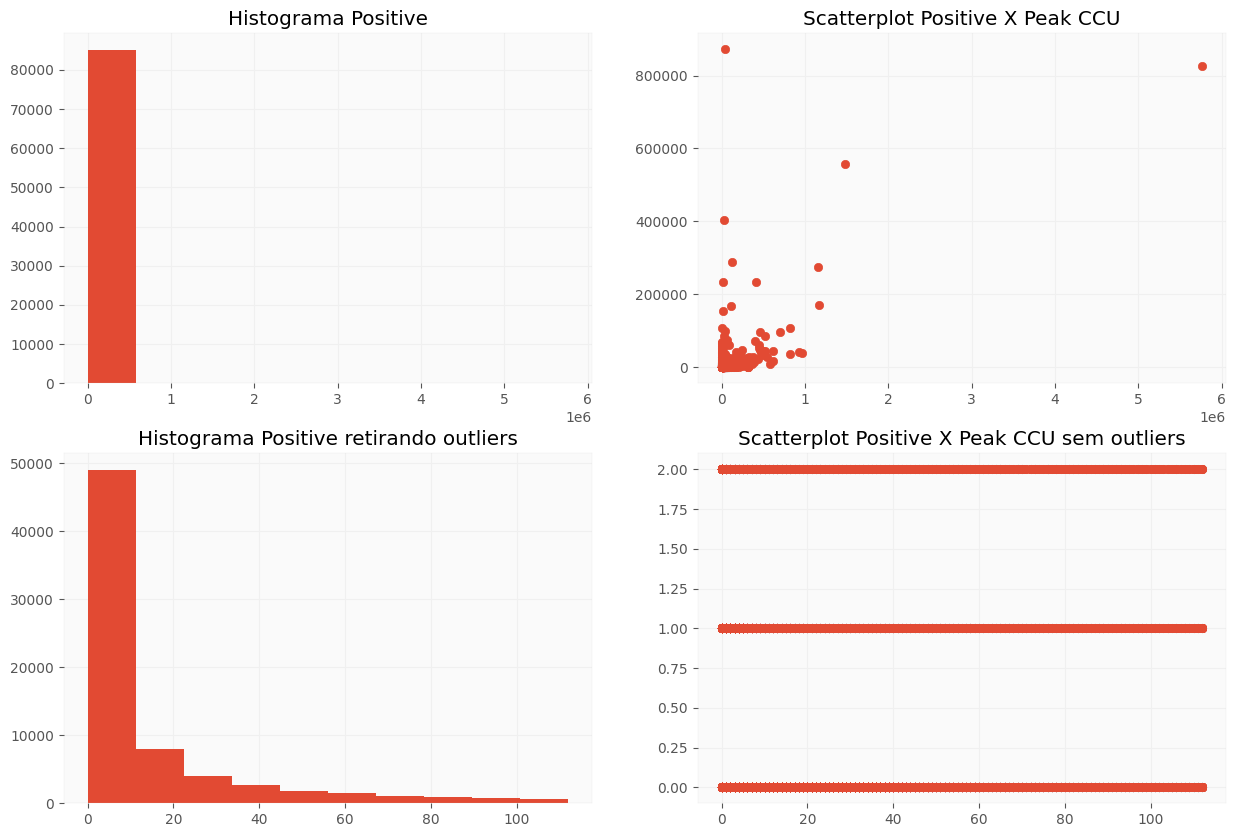

In [ ]:
plot_hist_scatter("Positive")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento das avaliações positivas e a concentração em torno do baixo número de usuários simultâneos.

#### Negative

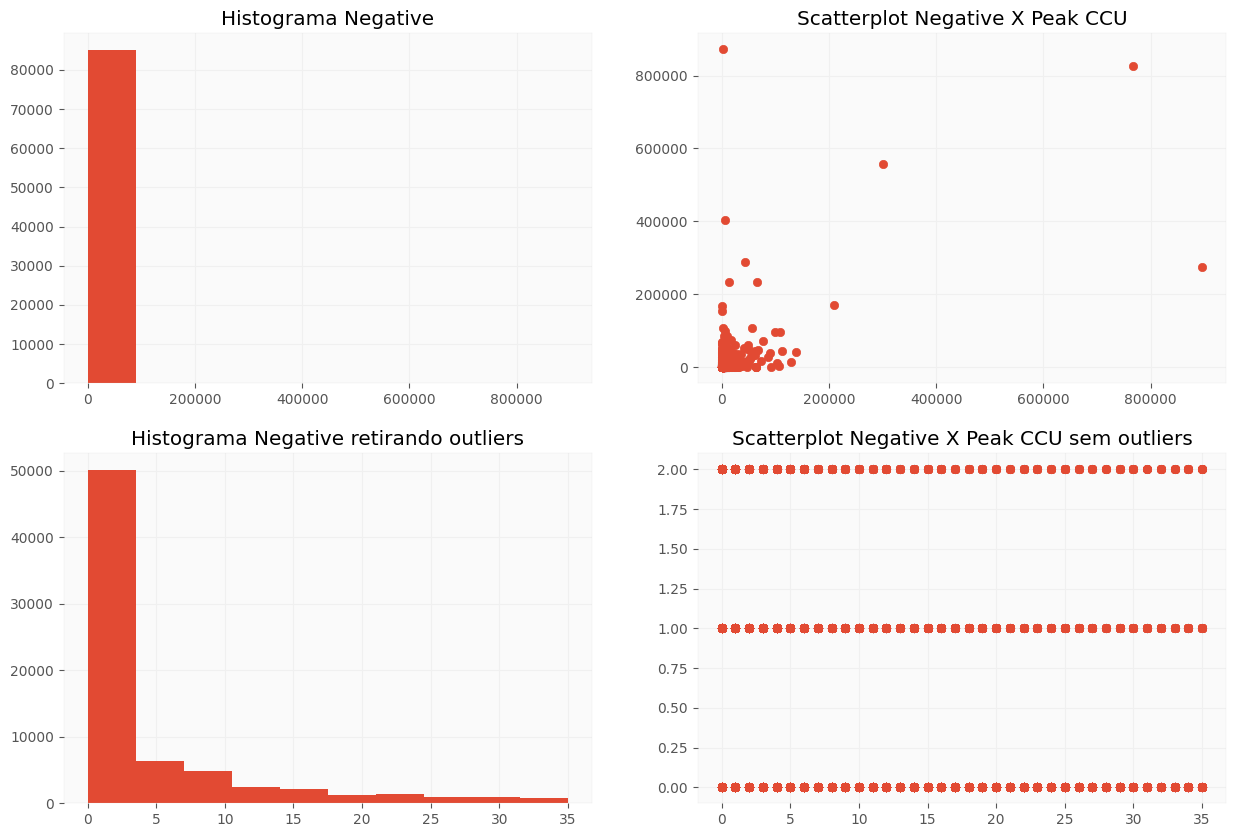

In [ ]:
plot_hist_scatter("Negative")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento das avaliações negativas e a concentração em torno do baixo número de usuários simultâneos.

#### Score Rank

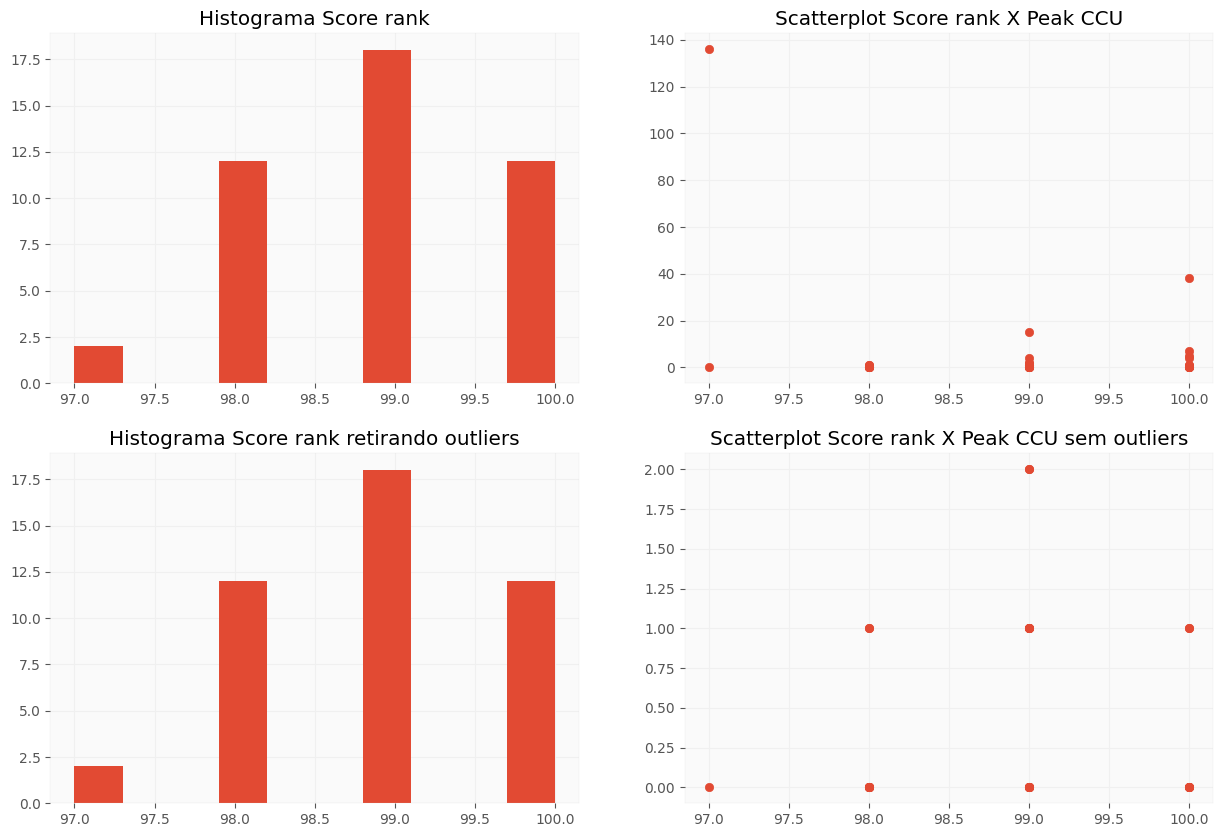

In [ ]:
plot_hist_scatter("Score rank")

Antes de remover os outliers percebe-se uma correlação de aumento e um possível outlier, após remover percebe-se uma correlação levemente positiva

#### Achievements

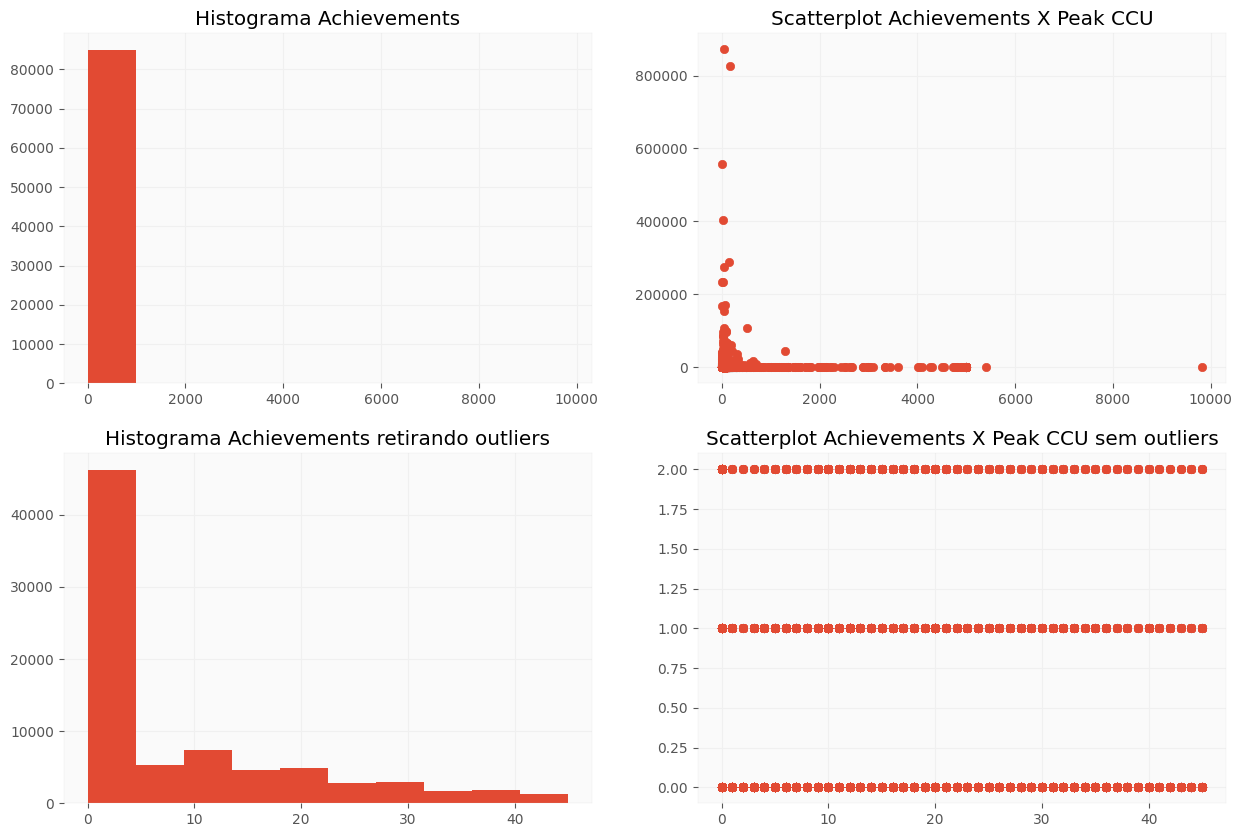

In [ ]:
plot_hist_scatter("Achievements")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento do número de conquistas Steam e a concentração em torno do baixo número de usuários simultâneos.

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Recommendations

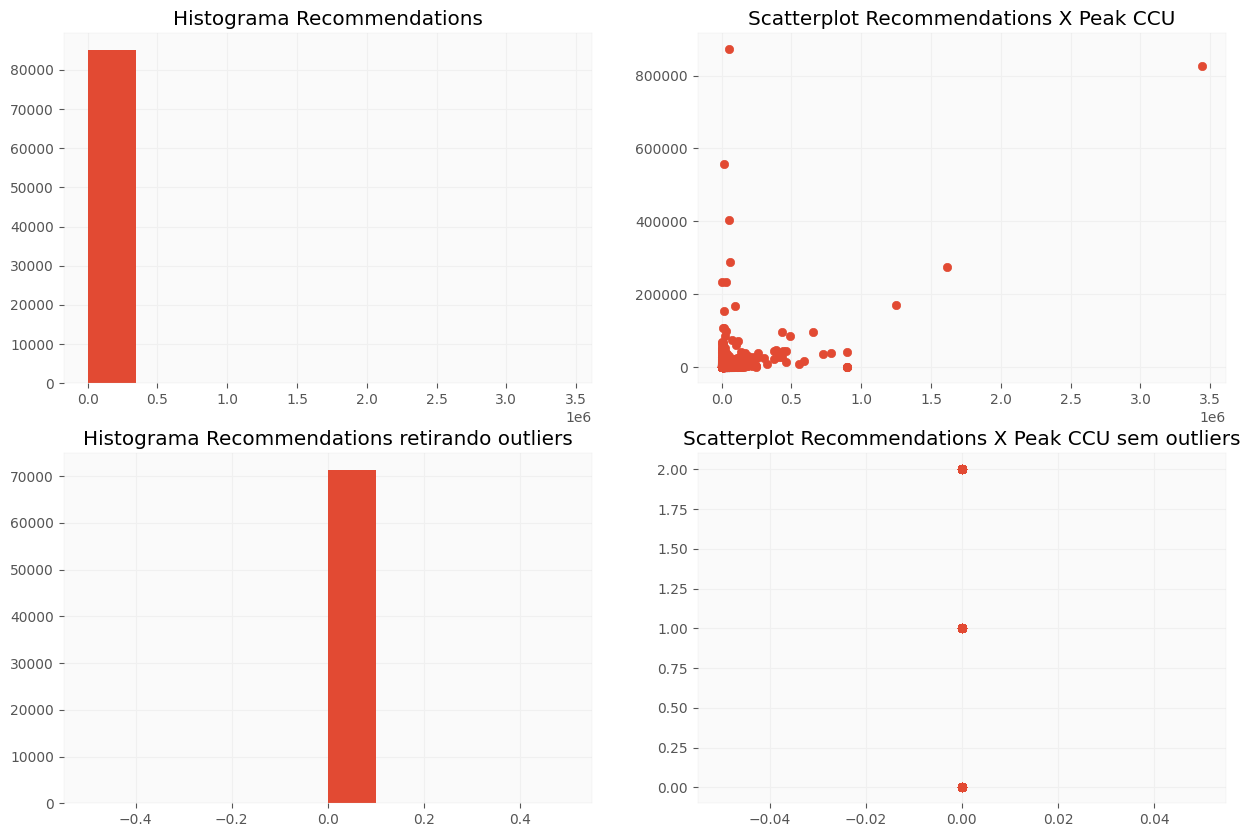

In [ ]:
plot_hist_scatter("Recommendations")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Average Playtime Forever

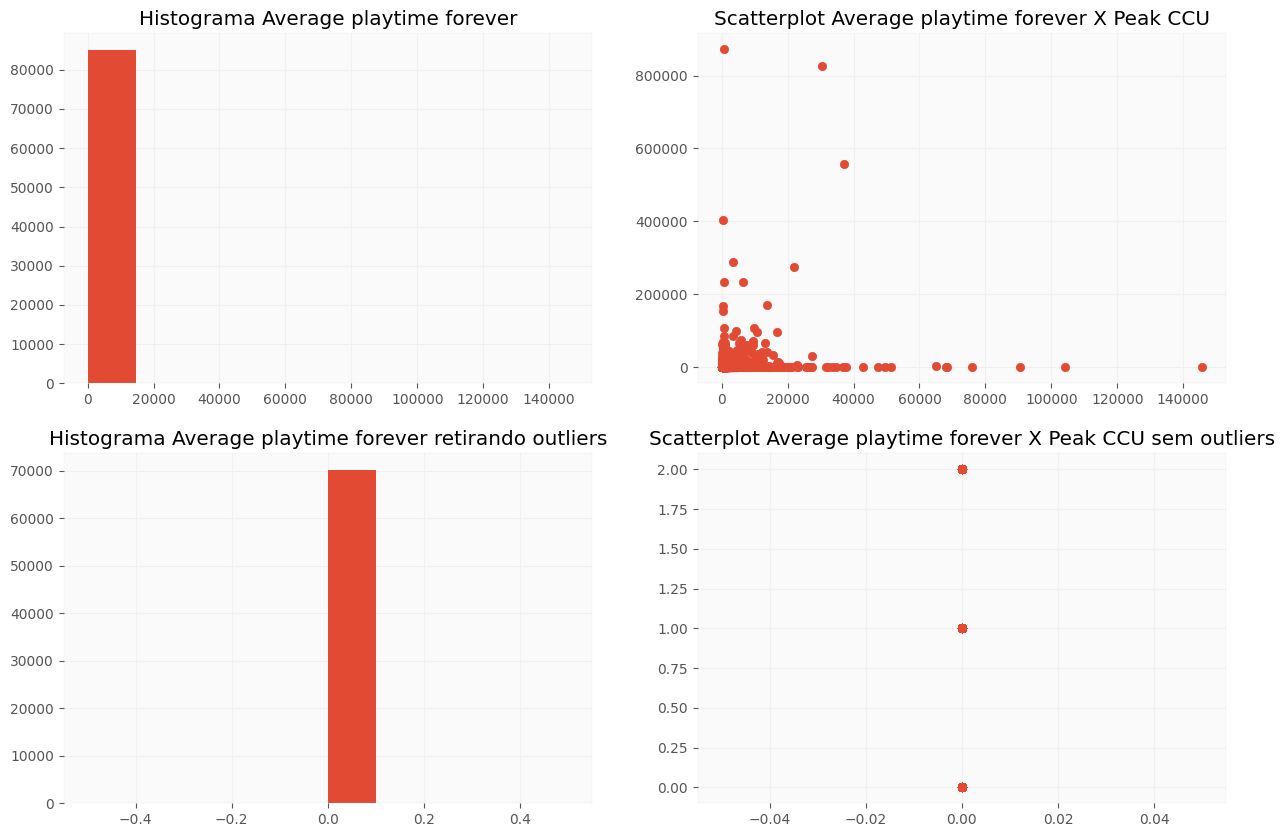

In [ ]:
plot_hist_scatter("Average playtime forever")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Average Playtime Two Weeks

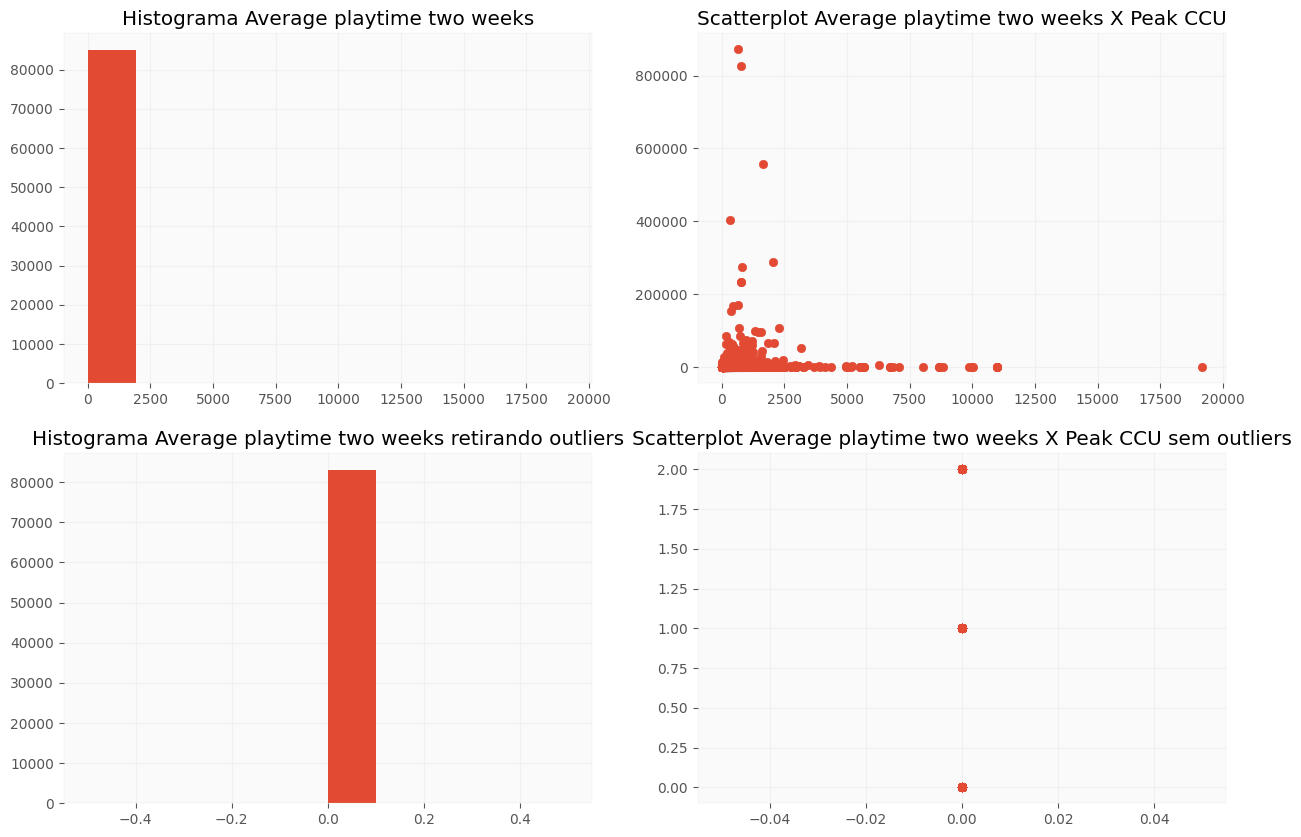

In [ ]:
plot_hist_scatter("Average playtime two weeks")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Median Playtime Forever

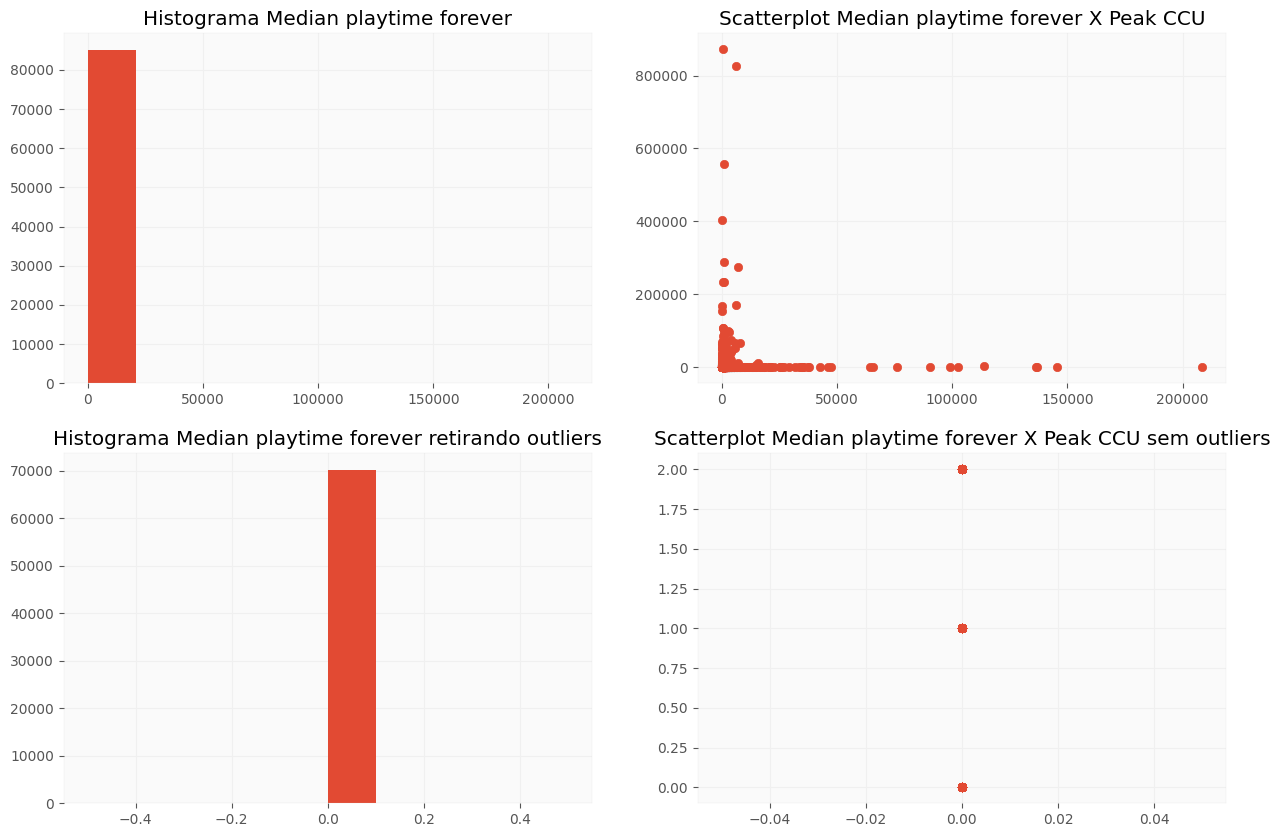

In [ ]:
plot_hist_scatter("Median playtime forever")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

#### Median Playtime Two Weeks

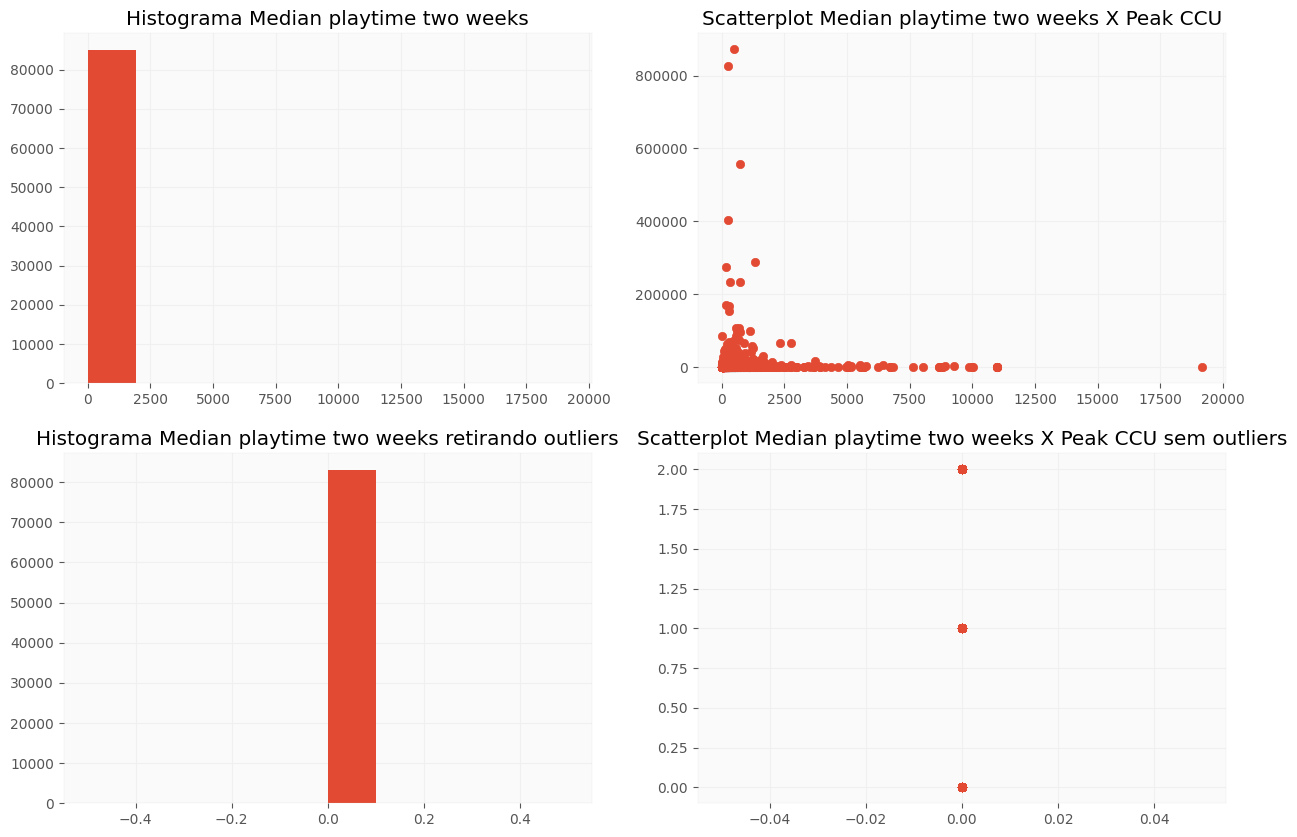

In [ ]:
plot_hist_scatter("Median playtime two weeks")

Antes de remover os outliers não se percebe correlação clara e após remover percebe-se a distribuição decrescente com o aumento dos preços e a concentração em torno do baixo número de usuários simultâneos.

### Metadados

As variáveis *Header image*, *Website*, *Metacritic url*,*Screenshots* e *Movies* guardam links para páginas web e portanto não terão visualizações nesse notebook.

# Pré-Processamento de Dados

### Tratamentos de Missings

De acordo com a análise feita na seção de valores faltantes, as colunas abaixo apresentam mais de 50% dos valores faltantes, dessa forma as colunas serão desconsideradas para a construção do modelo

In [ ]:
games_sm = games.drop(columns = ["Score rank","Metacritic url","Reviews","Notes","Website","Support url"])

Além disso, para os jogos que contém Playtest no nome, será atribuído a descrição "Playtest version of the game".

In [ ]:
games_sm.loc[games_sm["Name"].str.contains('Playtest',na=False),"About the game"] = "Playtest version of the game"

Para os jogos com lista vazia de linguas suportadas, será atribuído o valor "No information"

In [ ]:
games_sm.loc[games_sm["Supported languages"] =='[]',"Supported languages"] = "No information"

In [ ]:
games_sm.loc[games_sm["Full audio languages"] =='[]',"Full audio languages"] = "No information"

In [ ]:
games_sm.isnull().sum().sort_values(ascending = False)

,0
Tags,21100
Support email,13596
Movies,6453
Categories,4598
Publishers,3867
Developers,3587
Genres,3555
Screenshots,2006
About the game,193
Name,6


Para o restante dos valores faltantes, por se tratarem de variáveis qualitativas e metadados, será atribuído o valor "No information"

In [ ]:
games_sm = games_sm.fillna("No information")

<Axes: >

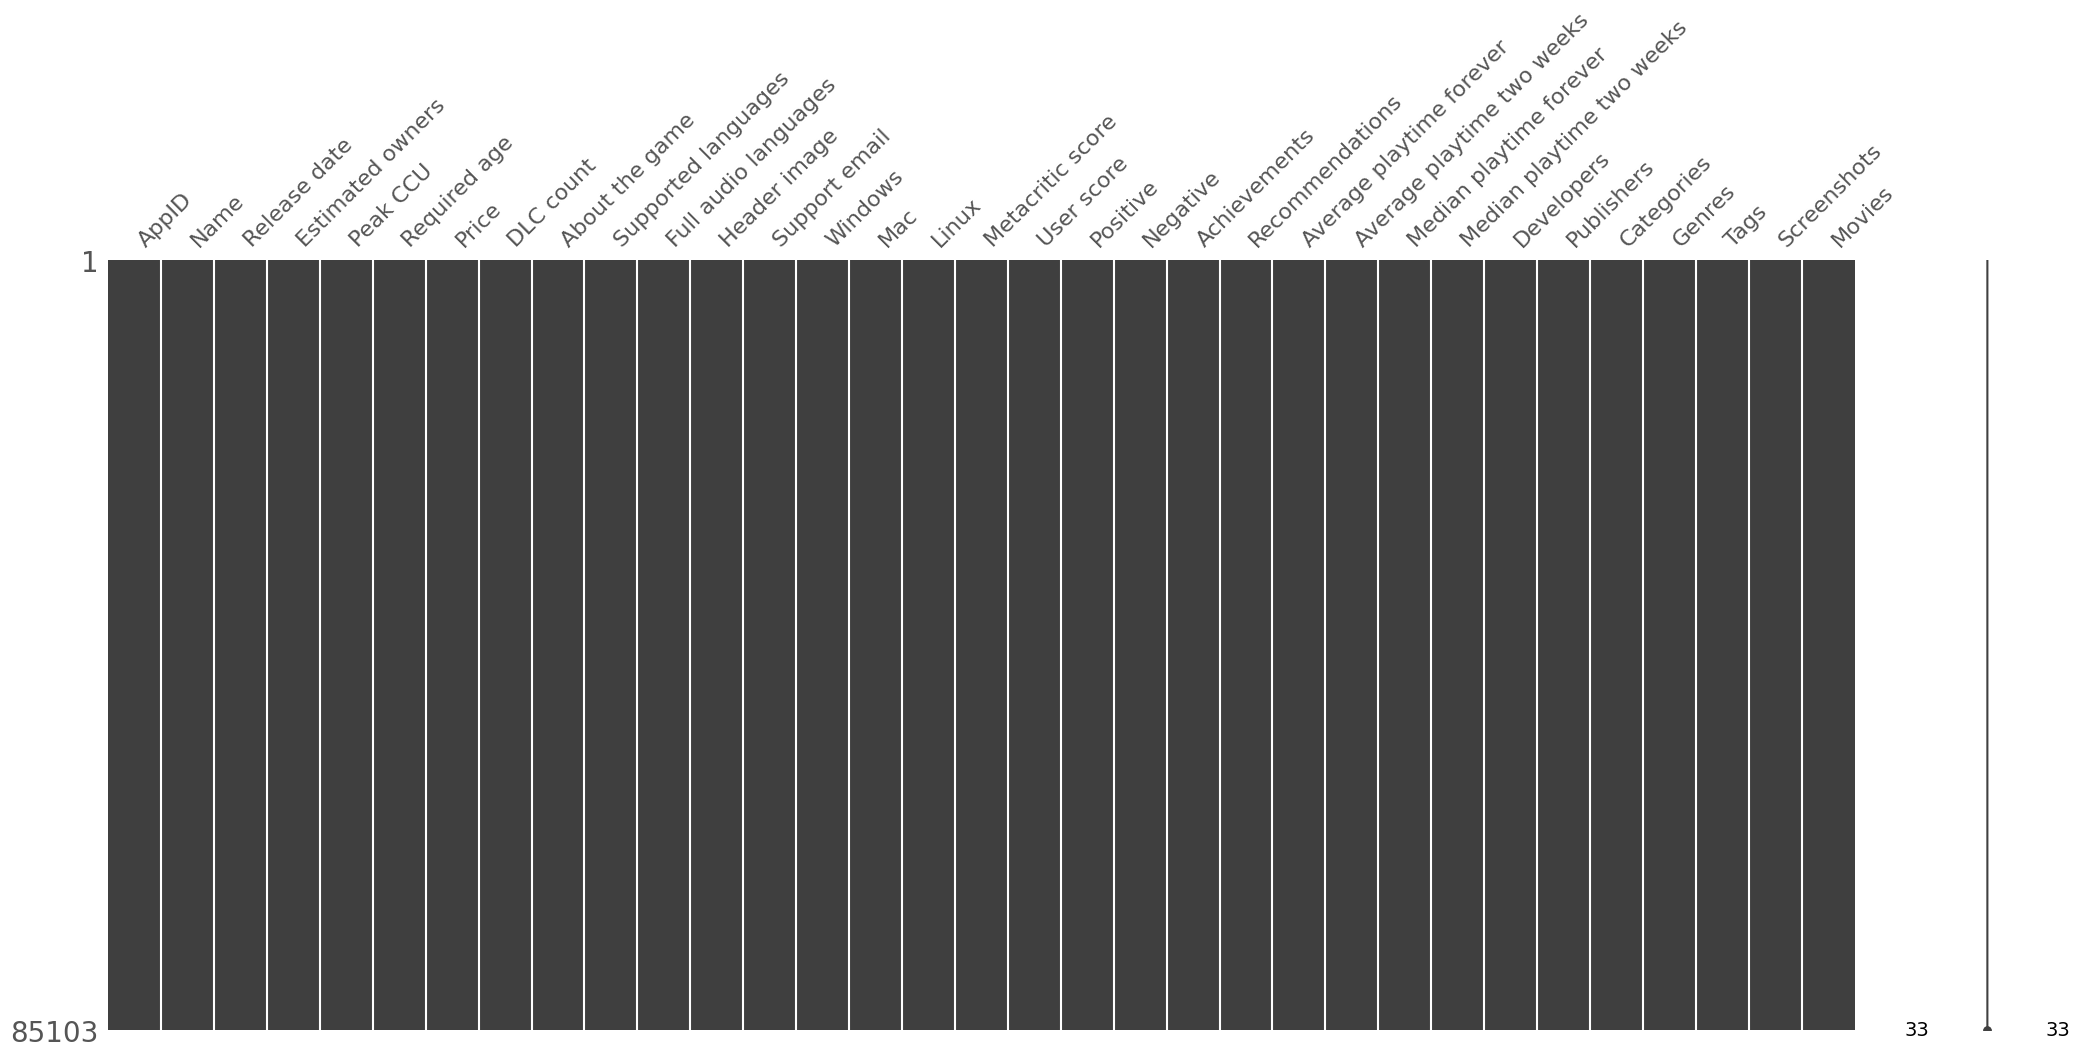

In [ ]:
ms.matrix(games_sm)

### Conversão de tipos

A variável Estimated owners pode ser convertida em categórica, visto que possui classificações discretas bem definidas.

In [ ]:
games_sm["Estimated owners"] = games_sm["Estimated owners"].astype("category") #2

Como visto no início, *Release date* está com formato de objeto. Para facilitar a operação com essa coluna é interessante executar a transformação para o tipo DateTime.

In [ ]:
games_sm["Release date"] = pd.to_datetime(games_sm["Release date"],format = "mixed") #1

As variáveis categóricas no formato de lista de categorias pode ser obtidas a partir de conversão da representação em string das listas.

In [ ]:
games_sm["Categories"] = games_sm["Categories"].apply(lambda lista_string: str(lista_string).split(','))
games_sm["Genres"] = games_sm["Genres"].apply(lambda lista_string: str(lista_string).split(','))
games_sm["Tags"] = games_sm["Tags"].apply(lambda lista_string: str(lista_string).split(','))

In [ ]:
games_sm["Supported languages"] = games_sm["Supported languages"].str.strip("][")
games_sm["Supported languages"] = games_sm["Supported languages"].str.replace("'","",regex=False) \
                                                                 .str.replace(", ",",", regex= False) \
                                                                 .str.replace("\\n",",") \
                                                                 .str.replace("\\r",",") \
                                                                 .str.replace("\\b","")
games_sm["Supported languages"] = games_sm["Supported languages"].apply(lambda lista_string: str(lista_string).split(','))

As variáveis *Screenshots*, *Movies* e *Support email*, que trazem metadatas no formato de links para páginas web pode ser convertida em variáveis booleanas que vão indicar a existência ou não de capturas de tela, clipes e suporte por e-mail, supondo que quando não possuem informação são não existentes.

In [ ]:
games_sm["Screenshots"] = games_sm["Screenshots"].apply(lambda row: row != "No information")
games_sm["Movies"] = games_sm["Movies"].apply(lambda row: row != "No information")
games_sm["Support email"] = games_sm["Support email"].apply(lambda row: row != "No information")


### Normalização

Como os valores já estão no intervalo de 0 a 100, foi feita a divisão por 100 para deixá=los no intervalo de 0 a 1, para impedir efeitos como o efeito escala

In [ ]:
games_sm["Metacritic score"] = games_sm["Metacritic score"]/100
games_sm["User score"] = games_sm["User score"]/100